In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [ ]:
%cd yolov5
%pip install -r requirements.txt

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train

In [5]:
!python train.py --img 640 --batch -1 --epochs 100 --data ../dataset/data.yaml --weights yolov5s.pt --cache --cfg yolov5s.yaml

      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=../dataset/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-304-g22361691 Python-3.11.5 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box


     7022326       15.95         0.306         57.63         86.15        (1, 3, 640, 640)                    list
     7022326       31.89         0.428         108.6         118.3        (2, 3, 640, 640)                    list
     7022326       63.78         0.826         205.8           208        (4, 3, 640, 640)                    list
     7022326       127.6         1.665           419         491.7        (8, 3, 640, 640)                    list
     7022326       255.1         3.215          1260          1288       (16, 3, 640, 640)                    list


      84/99      3.42G    0.02512   0.006875          0         27        640:  65%|██████▍   | 24/37 [01:47<00:56,  4.31s/it]
      84/99      3.42G    0.02512   0.006875          0         27        640:  68%|██████▊   | 25/37 [01:47<00:51,  4.31s/it]
      84/99      3.42G    0.02524   0.006996          0         34        640:  68%|██████▊   | 25/37 [01:52<00:51,  4.31s/it]
      84/99      3.42G    0.02524   0.006996          0         34        640:  70%|███████   | 26/37 [01:52<00:47,  4.31s/it]
      84/99      3.42G    0.02531   0.006957          0         24        640:  70%|███████   | 26/37 [01:56<00:47,  4.31s/it]
      84/99      3.42G    0.02531   0.006957          0         24        640:  73%|███████▎  | 27/37 [01:56<00:43,  4.31s/it]
      84/99      3.42G    0.02529   0.006932          0         26        640:  73%|███████▎  | 27/37 [02:00<00:43,  4.31s/it]
      84/99      3.42G    0.02529   0.006932          0         26        640:  76%|███████▌  | 28/37 [02:00<00

Проверим работоспособность на картинке из валидационной выборки и на картинки из интернета (на самом деле, далеко не на всех она видит хоть что-то, видимо связано со специфичностью датасета)

YOLOv5  v7.0-304-g22361691 Python-3.11.5 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


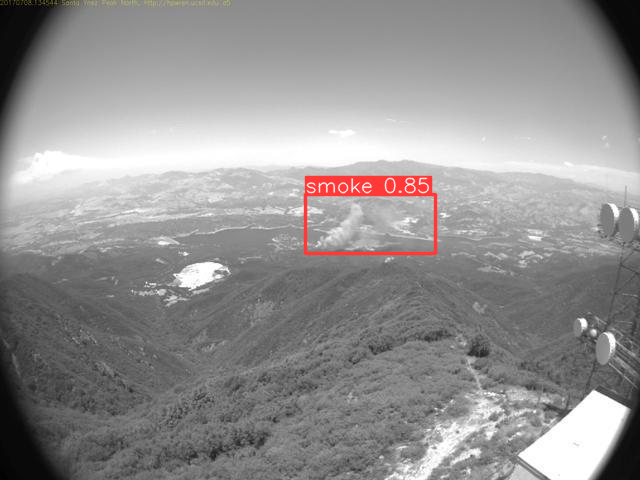

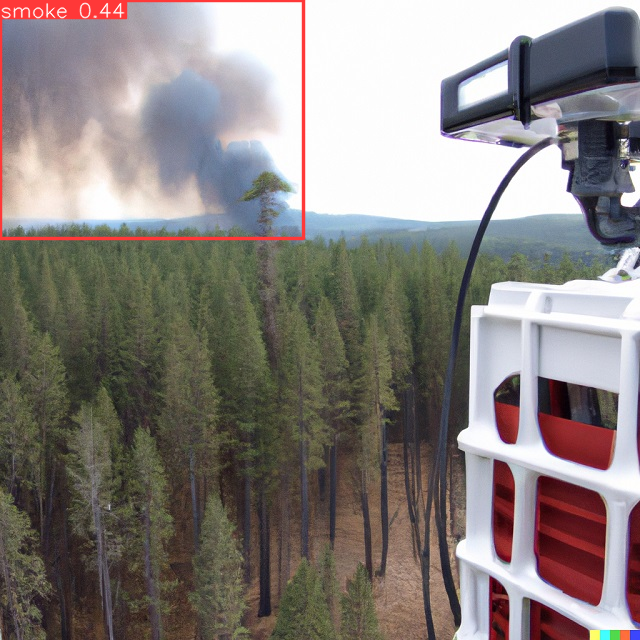

In [23]:
import torch

model = torch.hub.load('.', 'custom', path='../yolov5/runs/train/exp2/weights/best.pt', source='local') 
#model = torch.hub.load('.', 'custom', path='../best.pt', source='local')
path_image =  "../dataset/valid/images/ck0uk19kvwftk0944hsc0vul0_jpeg.rf.154e4e24cb17837e919a5290bc7ad896.jpg"

result = model(path_image)
result.show()

path_image =  "../imagesFromNet/1.jpg"

result = model(path_image)
result.show()

In [26]:
!python export.py --weights ../yolov5/runs/train/exp2/weights/best.pt --include torchscript onnx

export: data=D:\Programming\JupyterNotebooks\YOLO\yolov5\data\coco128.yaml, weights=['../yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5  v7.0-304-g22361691 Python-3.11.5 torch-2.3.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from ..\yolov5\runs\train\exp2\weights\best.pt with output shape (1, 25200, 6) (13.7 MB)

TorchScript: starting export with torch 2.3.0+cu118...
TorchScript: export success  2.4s, saved as ..\yolov5\runs\train\exp2\weights\best.torchscript (27.2 MB)

ONNX: starting export with onnx 1.16.0...
ONNX: export success  1.3s, saved as ..\yolov5\runs\train\exp2\weights\b

In [4]:
import onnx 

model = onnx.load('best.onnx')
output =[node.name for node in model.graph.output]

input_all = [node.name for node in model.graph.input]
input_initializer =  [node.name for node in model.graph.initializer]
net_feed_input = list(set(input_all)  - set(input_initializer))

print('Inputs: ', net_feed_input)
print('Outputs: ', output)

Inputs:  ['images']
Outputs:  ['output0']
